## Medical Image Segmentation with YOLOv8
Medical image segmentation is a crucial process in many medical imaging applications.

It involves dividing or partitioning an image into multiple segments or “**regions of interest**” that correspond to different objects or parts of objects.

It processes visual data at the pixel level, using various techniques to annotate individual pixels as belonging to a specific class or instance

In the context of medical imaging, these could be various tissues, organs, cells, or anomalies like tumors.


### Importance of Medical Image Segmentation
Medical image segmentation plays a vital role in numerous biomedical applications, including:

1. **Disease Diagnosis and Monitoring**: It helps in the identification and visualization of anomalies or structures of interest in medical images, aiding in disease diagnosis and monitoring.
2. **Treatment Planning**: It provides critical information for planning treatment strategies, such as radiation therapy for cancer treatment.
3. **Computer-Aided Surgery**: It assists in pre-operative planning and
intra-operative navigation during surgical procedures.

### Applications of Medical Image Segmentation
1. **Tumor Detection**: It can help in the detection and localization of tumors in various parts of the body.
2. **Organ Delineation**: It can assist in delineating organs in medical images, which is crucial for surgical planning and organ transplantation.
3. **Blood Vessel Visualization**: It can aid in visualizing blood vessels in angiography images, which is essential for diagnosing and treating vascular diseases.
4. **Cell Counting and Classification**: It can help in counting and classifying cells in microscopic images, which is crucial in diagnosing diseases like cancer and monitoring treatment response.
5. **Fracture Identification**: It can assist in identifying and analyzing fractures, which is vital for treatment planning and monitoring the recovery process.

### YOLOv8 for Medical Image Segmentation
YOLOv8 (You Only Look Once version 8) is a state-of-the-art, real-time object detection system that can also be used for medical image segmentation. It can classify, detect, and segment objects in images, making it a versatile tool for medical image analysis.

Due to its high quality and real-time performance, YOLOv8 is highly effective when it comes to segmentation.


**Let's get started!**

In [ ]:
#install packages
!pip install ultralytics

## Loading the image data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive
mkdir: cannot create directory ‘seg’: File exists


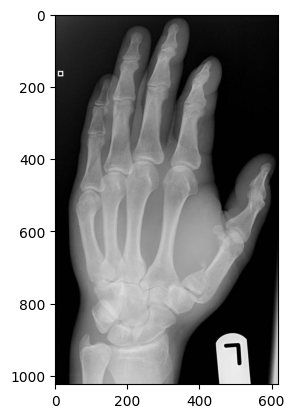

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import zipfile
from google.colab import drive

drive.mount('/content/drive')

!ls /content/drive

# Get the path of the zipped file
zip_path2 = "/content/drive/MyDrive/seg-2-full-.v10i.yolov8.zip"

#create a directory to save contents of the zip file
!mkdir seg

# Extract the image from the zipped file
with zipfile.ZipFile(zip_path2, 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/seg")


# Get the path of the image
image_path2 = "/content/drive/MyDrive/seg/train/images/0_jpg.rf.7c1fa257183034c8f81c3b1c36a084c7.jpg"

# Visualize the results
plt.imshow(plt.imread(image_path2))
plt.show()


## Zero Shot Learning
Zero-Shot Learning (ZSL) is particularly relevant to image segmentation, including medical image segmentation. In traditional segmentation models, the model is trained to recognize and segment specific classes or categories present in the training data. However, these models may struggle when encountering new classes not seen during training.

This is where ZSL comes into play. In the context of segmentation, Zero-Shot Segmentation models are trained in such a way that they can segment objects or classes they have never seen before during training. This is achieved by leveraging auxiliary information that associates observed and non-observed classes.

###  Loading and Using the YOLOv8 Segmentation Model with Zero-Shot Learning

In this section, we will load the YOLOv8 segmentation model, which is capable of Zero-Shot Learning (ZSL). We will use it to perform segmentation on an image, including classes that the model has not seen during training. Finally, we will visualize the segmentation results.


image 1/1 /content/drive/MyDrive/seg/train/images/0_jpg.rf.7c1fa257183034c8f81c3b1c36a084c7.jpg: 640x416 1 vase, 15.1ms
Speed: 2.9ms preprocess, 15.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 416)


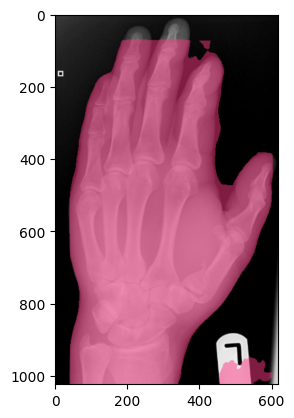

In [ ]:
# Load YOLOv8 segmentation model.nano
model = YOLO('yolov8n-seg.pt')

# Perform segmentation on the image
results2 = model(image_path2)

# Visualize the results
plt.imshow(results2[0].plot(boxes=False))
plt.show()

In [ ]:
#Exercise

#Try doing zero shot segmentation for various YOLOv8 segmentation variants and note the differences i.e small, medium, large and extra large

### Fine-Tuning the YOLOv8 Segmentation Model
In this section, we will fine-tune the YOLOv8 segmentation model. Fine-tuning involves training a pre-existing model (a process also known as transfer learning) on a new task. It leverages the learned feature representations of the original model, which can lead to significant improvements in performance, especially when the new task is similar to the original one.

In [ ]:
'''Import the required number of epochs for training. Use the 'yolo' command to
fine-tune the YOLOv8 model. Set the task to 'segment'. Set the mode to 'train'.
Specify the pre-trained YOLOv8 model. Set the image size for the model.
Specify the path to the dataset. Set the number of epochs for training. Set the
batch size. Name our model 'yolov8s-seg'. Allow the existing output directory to be
overwritten if it exists. Do not use mixed precision training.  '''

EPOCHS = 20
!yolo \
task=segment \
mode=train \
model=yolov8s-seg.pt \
imgsz=640 \
data=/content/drive/MyDrive/seg/data.yaml \
epochs={EPOCHS} \
batch=8 \
name=yolov8s-seg \
exist_ok=True \
amp=False

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/drive/MyDrive/seg/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

# Exercise: Exploring YOLOv8 Segmentation Variants

In this exercise, you will experiment with different YOLOv8 segmentation variants, batch sizes, and epochs to observe their effects on the segmentation results.

1. **Segmentation Variants**: Try using different YOLOv8 segmentation variants such as 'yolov8s-seg', 'yolov8m-seg', 'yolov8l-seg', and 'yolov8x-seg'. Observe how the size and complexity of the model affect the segmentation results and computation time.

2. **Batch Sizes**: Experiment with different batch sizes. Start with a small batch size (e.g., 2 or 4), and gradually increase it (e.g., 8, 16, 32). Note how the batch size impacts the training speed and memory usage.

3. **Epochs**: Vary the number of epochs for training. Begin with a small number of epochs (e.g., 5 or 10) and gradually increase it (e.g., 20, 50, 100). Observe how the number of epochs affects the model's performance and overfitting.

Remember to record your observations and findings. This will help you understand the trade-offs involved and make informed decisions when fine-tuning models for your specific tasks. Happy experimenting!


In [1]:
#To do.

### Image Inference
Now that we've trained our model, it's time to put it to the test! We'll select the best performing model and use it to run inference on a set of images.

In [2]:
import glob
import os

# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in either a 1x1 grid or 2x2 grid.
    """
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(1, 1, i+1)
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.axis('off')
            if i == 3:
                break
    plt.tight_layout()
    plt.show()

This command is used to run the YOLOv8 model for inference on a set of images, using the best weights obtained from training. It specifies the model weights, the source of the images, the name for this run, and whether to overwrite existing files. It also ensures the results are saved for further analysis. This is a crucial step in evaluating the performance of the trained model.

In [ ]:
!yolo predict \
model='/content/runs/segment/yolov8s-seg/weights/best.pt' \
source='/content/drive/MyDrive/seg/valid/images/' \
name='yolov8s_predict' \
exist_ok=True \
save=True

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/26 /content/drive/MyDrive/seg/valid/images/234_jpg.rf.fd15141b60fbbffd204f7f8ed1aadd85.jpg: 640x416 1 fracture, 19 normals, 124.5ms
image 2/26 /content/drive/MyDrive/seg/valid/images/236_jpg.rf.cfcb7fe266dd20be5d9c1f97d853b42a.jpg: 640x288 6 normals, 159.5ms
image 3/26 /content/drive/MyDrive/seg/valid/images/29_jpg.rf.49e3781ff7329856ee71976bc8971f7f.jpg: 640x416 1 fracture, 4 normals, 15.9ms
image 4/26 /content/drive/MyDrive/seg/valid/images/30_jpg.rf.248f62709073743f20ec02355d89274b.jpg: 640x416 2 normals, 16.7ms
image 5/26 /content/drive/MyDrive/seg/valid/images/31_jpg.rf.e2ff1c8ea17a5c9bd325a8bd96db97eb.jpg: 640x640 8 normals, 22.9ms
image 6/26 /content/drive/MyDrive/seg/valid/images/34_jpg.rf.5a0b20ce248499a902e02c5ee49d1125.jpg: 640x352 8 normals, 151.7ms
image 7/26 /content/drive/MyDrive/seg/valid/im

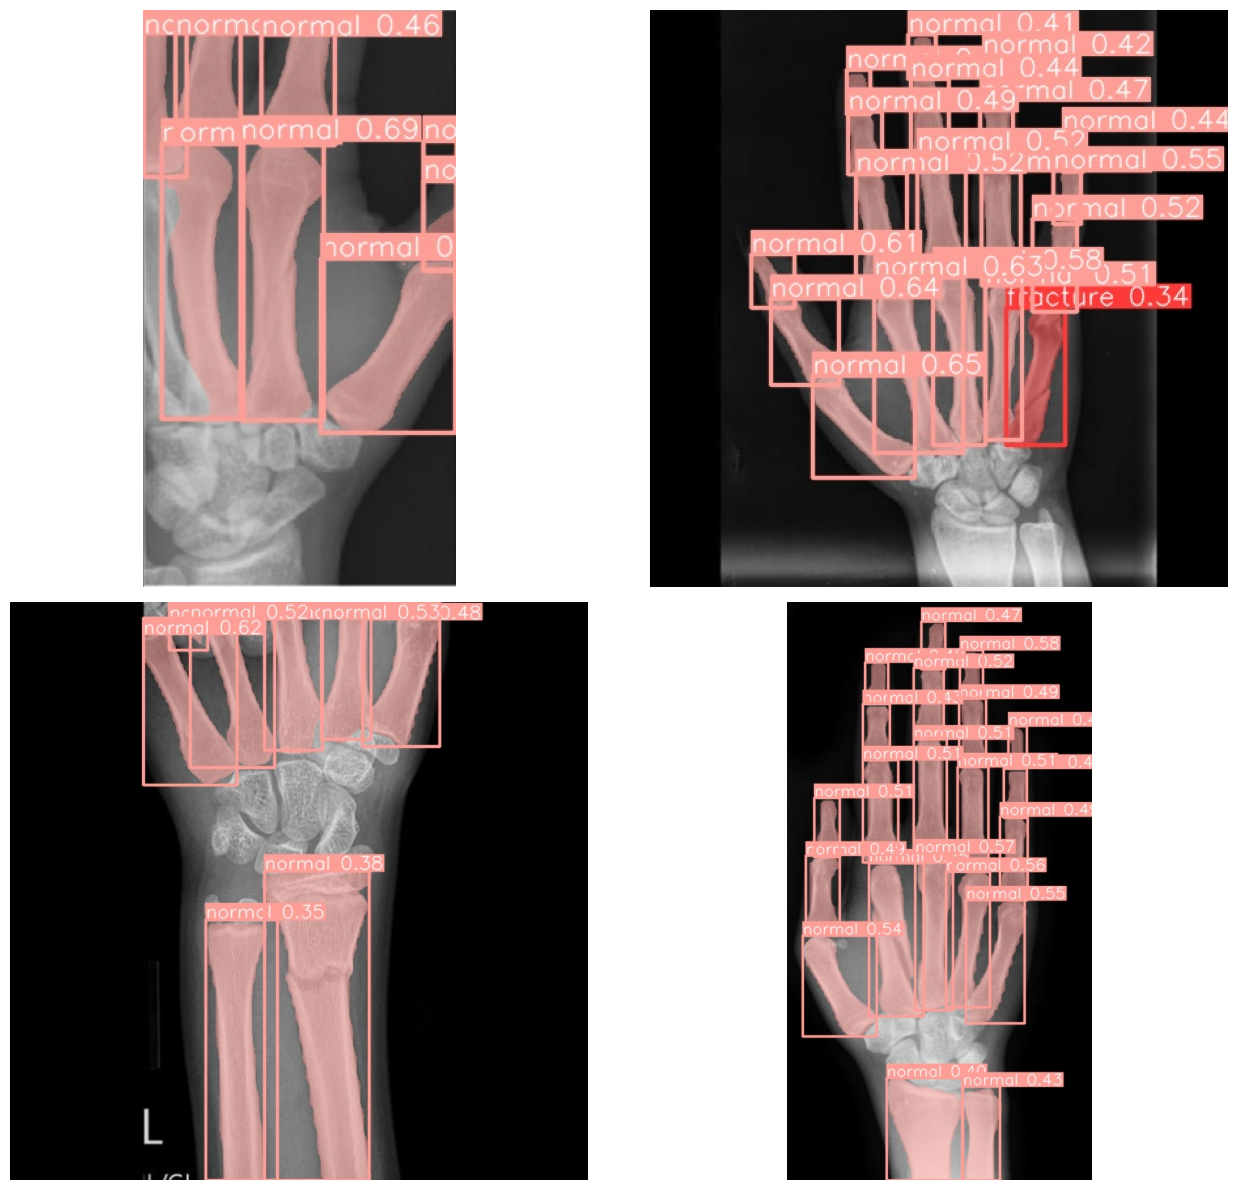

In [ ]:
# visualize the segmentation results obtained from the inference run
visualize('/content/runs/segment/yolov8s_predict')

In [ ]:
#inference on videos
!yolo predict \
model='runs/segment/yolov8m-seg/weights/best.pt' \
source='' \
name='yolov8m_predict_videos1' \
exist_ok=True \
save=True